# Large Population: Neutral *vs* Selection

The parameters are summarized in the table below:

Parameter  | Neutral | Selection  |
-----------|---------|------------|
Final size | $10^8$  |   $10^8$   |
q (start)  |$10^{-3}$| $10^{-3}$  |
q-factor   | $1$   |   $1$    |  
P(death)   | $0.3$   |   $0.3$    |
Selection  | **0**   |  **0.3**   |  

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from ThesisScripts.MyModel import *
from ThesisScripts.Analyses import *
from ThesisScripts.Visualizations import *
from ThesisScripts.PhyloTree import *

from IPython.display import Image

import seaborn as sns
sns.set_style("whitegrid")

import matplotlib.pyplot as plt
%matplotlib inline

#matplotlib preamble, taken from http://blog.juliusschulz.de/blog/ultimate-ipython-notebook
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 14, 7
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

# Reference simulations

## Neutral

In [2]:
# set seed to get same result for each test simulation
np.random.seed(123)

# Test cell
l = 10**8
q = 10**(-3)
qfac = 1
alpha = 0.3
sel = 0
large_N = Population(l, q, mutfactor=qfac, death_frac=alpha, selection=sel)
large_N.simulate()
print("Total population size:", large_N.size)
print("Generations:", large_N.gen)
print()
print("Start clone size:", large_N.start_clone.size)
print("Number of subclones:", len(large_N.clones[1:]))

Total population size: 116402657
Generations: 35

Start clone size: 114956110
Number of subclones: 166236


## In case of selection

In [3]:
# set seed to get same result for each test simulation
np.random.seed(123)

# Test cell
l = 10**8
q = 10**(-3)
qfac = 1
alpha = 0.3
sel = 0.3
large_S = Population(l, q, mutfactor=qfac, death_frac=alpha, selection=sel)
large_S.simulate()
print("Total population size:", large_S.size)
print("Generations:", large_S.gen)
print()
print("Start clone size:", large_S.start_clone.size)
print("Number of subclones:", len(large_S.clones[1:]))

Total population size: 116402657
Generations: 35

Start clone size: 2159346
Number of subclones: 165726


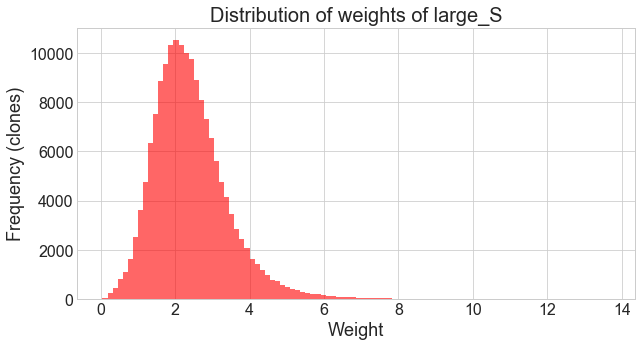

In [4]:
# Check weights of clones for population with selection
weights = []
for clone in large_S.clones:
    weights.append(clone.weight)

plt.figure(figsize=(10,5))
plt.hist(weights, bins=100, color='r', alpha=0.6)
plt.title("Distribution of weights of large_S")
plt.xlabel("Weight")
plt.ylabel("Frequency (clones)")
plt.show()

### *Final_data*

In [5]:
large_N_data = final_data(large_N)
large_S_data = final_data(large_S)
large_N_data.head()

,Birthday,q,Final size,Family size,Allele frequency,Mutations,Children,Weight,RGB color
Clone ID,,,,,,,,,
A,0,0.001,114956110,116402657,1.000000,0,164368,1,"(0, 0, 0)"
A.0,7,0.001,0,0,0.000000,1,0,1,"(96, 113, 126)"
A.1,15,0.001,156548,157277,0.001351,1,225,1,"(198, 141, 156)"
A.2,15,0.001,65209,65862,0.000566,1,92,1,"(108, 63, 84)"
A.3,16,0.001,0,0,0.000000,1,0,1,"(3, 17, 88)"


**ALL ANALYSES** are carried out with the detection limit defined below, unless otherwise stated.

In [6]:
detection_limit = 100

## Evolution of clone family sizes

### Large Neutral

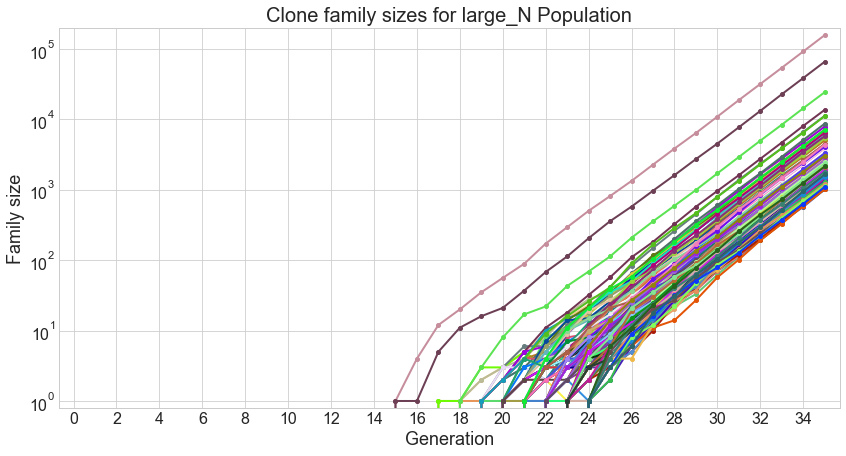

In [7]:
large_N_fam_size_plot = family_size_plots(large_N, det_lim=1000);
plt.title("Clone family sizes for large_N Population");
plt.xticks(range(0, large_N.gen+1, 2));
#plt.legend();
plt.margins(0.02);
#plt.savefig("./Figures/Large-Neutral_vs_Selection/large_N-fam_size_evo.png");
plt.show()

### Large Selection

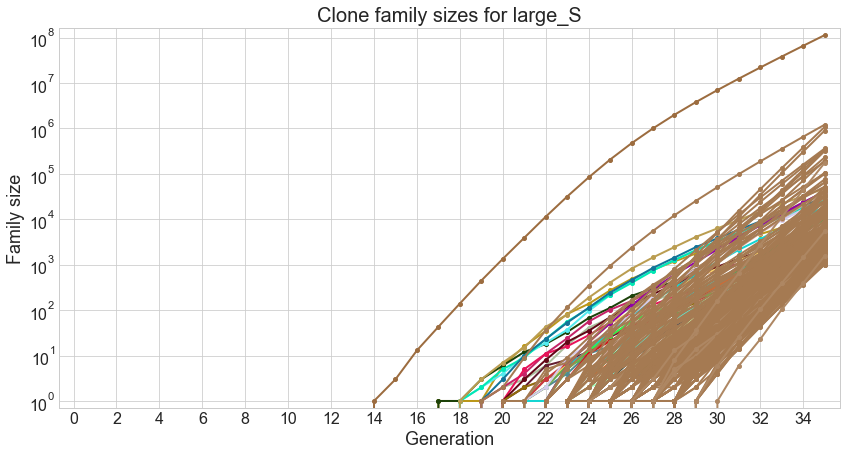

In [8]:
large_S_fam_size_plot = family_size_plots(large_S, det_lim=1000);
plt.title("Clone family sizes for large_S");
plt.xticks(range(0, large_S.gen+1, 2));
plt.margins(0.02);
#plt.legend();
#plt.savefig("./Figures/Large-Neutral_vs_Selection/large_S-fam_size_evo.png");
plt.show()

## Phylo tree for Reference Population

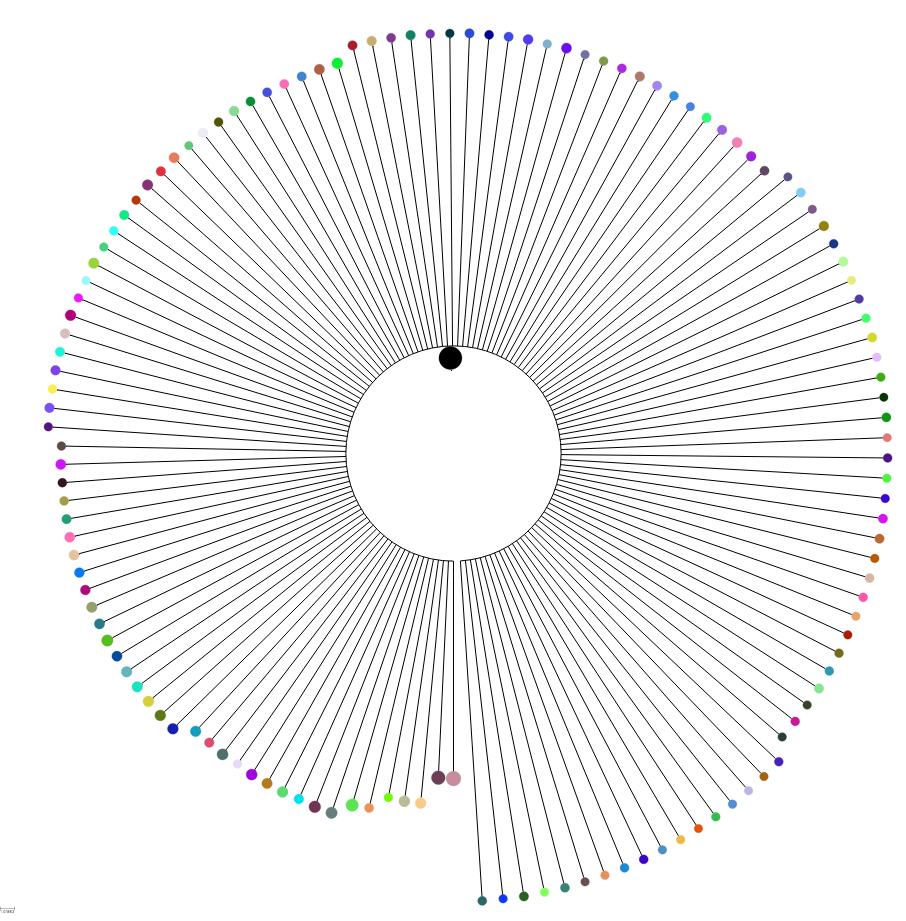

In [9]:
large_N_tree, large_N_ts = build_tree(large_N, det_lim=1000, log=True)
#print(large_N_tree)
large_N_ts.mode = 'c'
large_N_tree.render("./Figures/Large-Neutral_vs_Selection/large_N-tree.png", tree_style=large_N_ts, h=260, units='mm');
Image("./Figures/Large-Neutral_vs_Selection/large_N-tree.png")

## Phylo tree for Reference Population with Selection

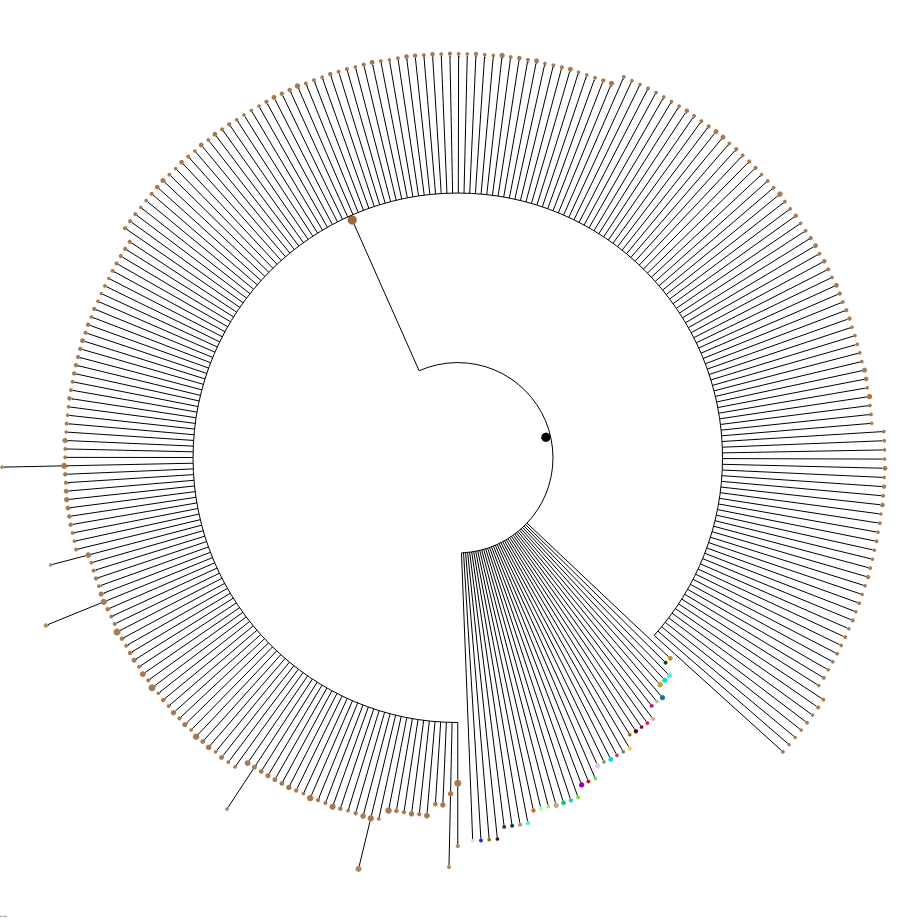

In [10]:
large_S_tree, large_S_ts = build_tree(large_S, det_lim=1000, log=True)
#print(large_S_tree)
large_S_ts.mode = 'c'
large_S_tree.render("./Figures/Large-Neutral_vs_Selection/large_S-tree.png", tree_style=large_S_ts, h=260, units='mm');
Image("./Figures/Large-Neutral_vs_Selection/large_S-tree.png")

## Allele frequency spectrum for Reference Population

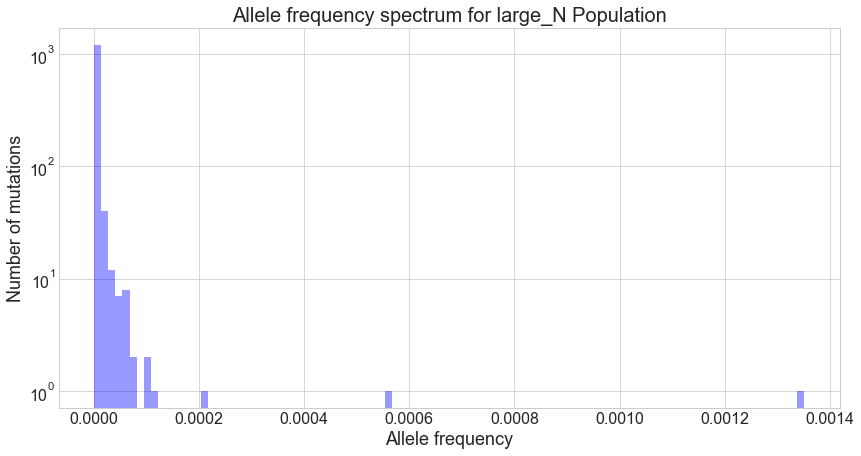

In [11]:
large_N_af = large_N_data.loc[large_N_data["Family size"] >= detection_limit]["Allele frequency"]
sns.distplot(large_N_af.iloc[1:], kde=False, norm_hist=False, bins=100, color='b')
plt.ylabel('Number of mutations');
plt.xlabel('Allele frequency');
plt.title('Allele frequency spectrum for large_N Population');
plt.yscale('log');
plt.savefig("./Figures/Large-Neutral_vs_Selection/large_N-AF_spec.png");
plt.show()

## Allele frequency spectrum for Reference Population with Selection

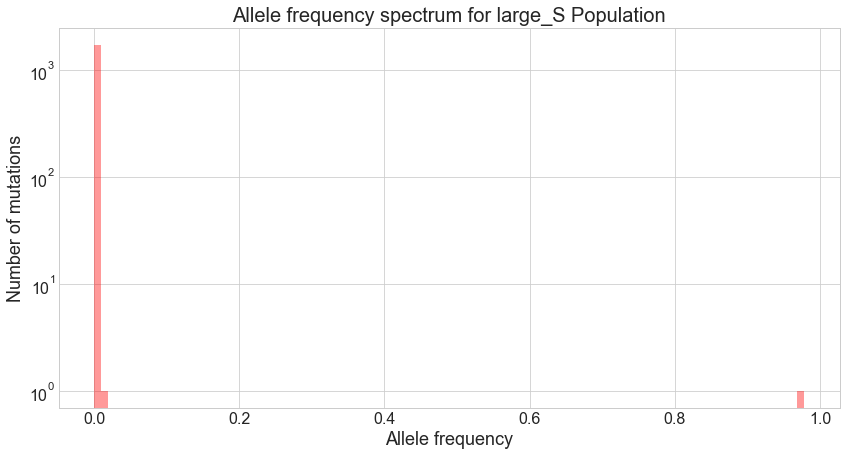

In [12]:
large_S_af = large_S_data.loc[large_S_data["Family size"] >= detection_limit]["Allele frequency"]
sns.distplot(large_S_af.iloc[1:], kde=False, norm_hist=False, bins=100, color='r')
plt.ylabel('Number of mutations');
plt.xlabel('Allele frequency');
plt.title('Allele frequency spectrum for large_S Population');
plt.yscale('log');
plt.savefig("./Figures/Large-Neutral_vs_Selection/large_S-AF_spec.png");
plt.show()

## Cumulative number of mutations in function of 1/f 


R^2 = 0.9995997729086211


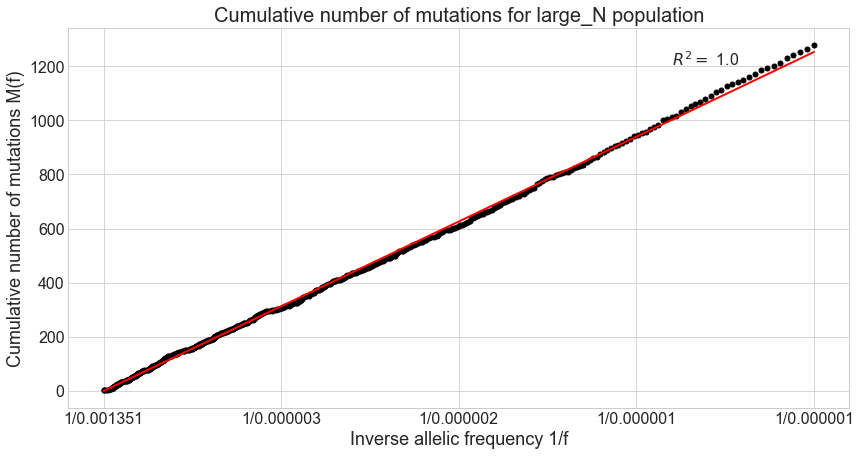


R^2 = 0.9939326493809677


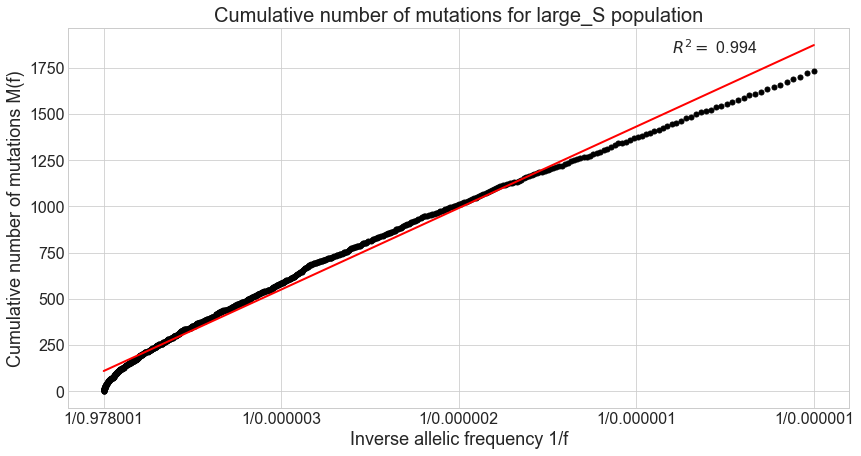

In [13]:
fit_large_N_af_r_value = fit_cumulative_mutations(large_N_data, det_lim=detection_limit, plot=True)
print("\nR^2 =", fit_large_N_af_r_value)
plt.title("Cumulative number of mutations for large_N population");
plt.savefig("./Figures/Large-Neutral_vs_Selection/large_N-Cum_num_M.png");
plt.show()

fit_large_S_af_r_value = fit_cumulative_mutations(large_S_data, det_lim=detection_limit, plot=True)
print("\nR^2 =", fit_large_S_af_r_value)
plt.title("Cumulative number of mutations for large_S population");
plt.savefig("./Figures/Large-Neutral_vs_Selection/large_S-Cum_num_M.png");
plt.show()

## Heterogeneity

0.9851226327632152 0.14247870085880798


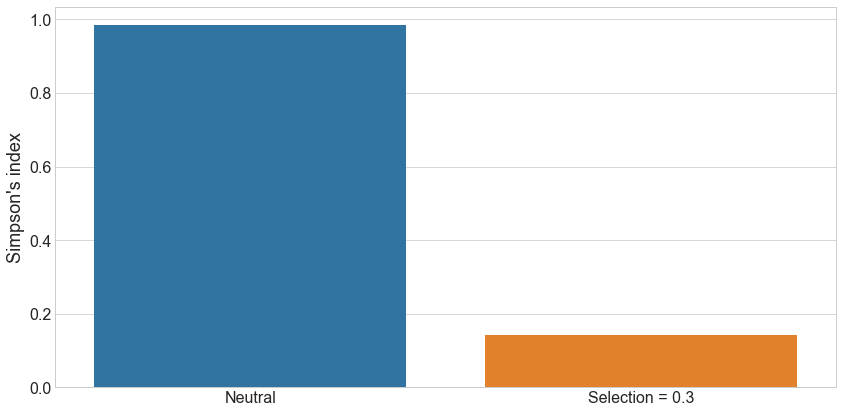

In [14]:
large_N_H = heterogeneity(large_N_data, det_lim=1)
large_S_H = heterogeneity(large_S_data, det_lim=1)
print(large_N_H, large_S_H)
sns.barplot(x=[0, 1], y=[large_N_H, large_S_H]);
plt.xticks([0,1], ["Neutral", "Selection = 0.3"]);
plt.ylabel("Simpson's index");
plt.savefig("./Figures/Large-Neutral_vs_Selection/Neutral_vs_Sel-Heterogeneity.png")
plt.show()

## Distribution of number of mutations for Reference Population

             Neutral, mean = 1.003  Selection = 0.3, mean = 1.068
# mutations                                                      
1                         883648.0                      106154819
2                           2462.0                        7342127
3                              NaN                         205779
4                              NaN                            818


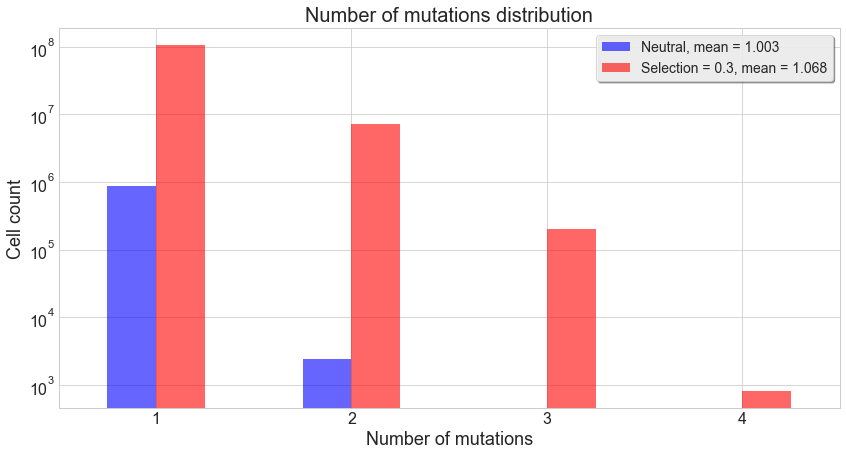

In [15]:
large_N_num_mut_df = num_mutations_distribution(large_N_data, det_lim=detection_limit)
large_N_avg_num_mut = avg_num_mutations(large_N_num_mut_df)
large_N_num_mut_df.columns = ["Neutral, mean = %s" %(round(large_N_avg_num_mut, 3))]
#large_N_num_mut_df.plot(kind='bar', logy=True, legend=True, rot=0, color='b', alpha=0.6);

large_S_num_mut_df = num_mutations_distribution(large_S_data, det_lim=detection_limit)
large_S_avg_num_mut = avg_num_mutations(large_S_num_mut_df)
large_S_num_mut_df.columns = ["Selection = %s, mean = %s" %(sel, round(large_S_avg_num_mut, 3))]
#large_S_num_mut_df.plot(kind='bar', logy=True, legend=True, rot=0, color='r', alpha=0.6);

combo = large_N_num_mut_df.join(large_S_num_mut_df, how='right')
print(combo)
combo.plot(kind='bar', logy=True, legend=True, rot=0, color=['b', 'r'], alpha=0.6);

plt.ylabel("Cell count");
plt.xlabel("Number of mutations");
plt.title("Number of mutations distribution");
plt.legend(frameon=True, fancybox=True, shadow=True);
plt.savefig("./Figures/Large-Neutral_vs_Selection/Neutral_vs_Sel-Num_mut.png")
plt.show()

## Reconstructing the mutational timeline in DIMENSIONLESS UNITS OF TIME!


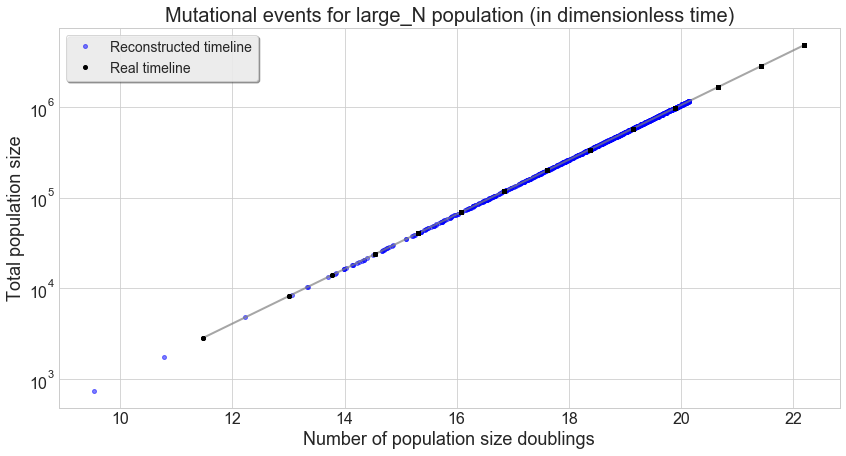

In [16]:
alpha_N = large_N.death_frac

large_N_mutations = large_N_data.loc[large_N_data['Family size'] >= 100].iloc[1:]
large_N_real_t = large_N_mutations["Birthday"].values
large_N_real_T = large_N_real_t*np.log(2-alpha_N)/np.log(2)
large_N_real_popsizes = list(large_N.size_vec[i] for i in large_N_real_t)

large_N_rec_T, large_N_rec_popsizes, large_N_rec_errors = reconstruct_mutational_timeline(large_N_data, alpha_N, det_lim=detection_limit)

plt.plot(large_N_rec_T, large_N_rec_popsizes, marker='.', color='b', alpha=0.5, linestyle='none', label='Reconstructed timeline');
plt.plot(large_N_real_T, large_N_real_popsizes, color='gray', alpha=0.7);
plt.plot(large_N_real_T, large_N_real_popsizes, marker='.', color='k', linestyle='none', label='Real timeline');

plt.xlabel('Number of population size doublings');
plt.ylabel('Total population size');
plt.title('Mutational events for large_N population (in dimensionless time)');
plt.legend(loc='upper left', frameon=True, fancybox=True, shadow=True);
plt.yscale('log');
plt.savefig("./Figures/Large-Neutral_vs_Selection/large_N-Rec_mut_timeline.png");
plt.show()

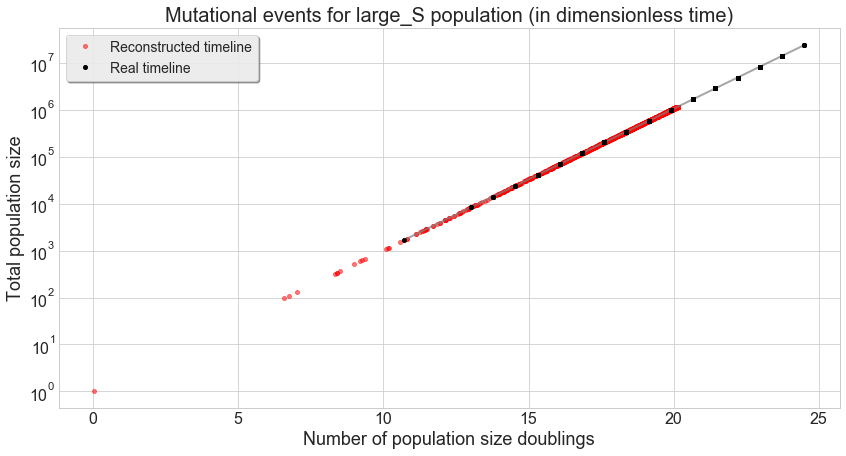

In [17]:
alpha_S = large_S.death_frac

large_S_mutations = large_S_data.loc[large_S_data['Family size'] >= 100].iloc[1:]
large_S_real_t = large_S_mutations["Birthday"].values
large_S_real_T = large_S_real_t*np.log(2-alpha_S)/np.log(2)
large_S_real_popsizes = list(large_S.size_vec[i] for i in large_S_real_t)

large_S_rec_T, large_S_rec_popsizes, large_S_rec_errors = reconstruct_mutational_timeline(large_S_data, alpha_S, det_lim=detection_limit)

plt.plot(large_S_rec_T, large_S_rec_popsizes, marker='.', color='r', alpha=0.5, linestyle='none', label='Reconstructed timeline');
plt.plot(large_S_real_T, large_S_real_popsizes, color='gray', alpha=0.7);
plt.plot(large_S_real_T, large_S_real_popsizes, marker='.', color='k', linestyle='none', label='Real timeline');

plt.xlabel('Number of population size doublings');
plt.ylabel('Total population size');
plt.title('Mutational events for large_S population (in dimensionless time)');
plt.legend(loc='upper left', frameon=True, fancybox=True, shadow=True);
plt.yscale('log');
plt.savefig("./Figures/Large-Neutral_vs_Selection/large_S-Rec_mut_timeline.png");
plt.show()